<a href="https://colab.research.google.com/github/ng0177/network/blob/main/nonlinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non linear regression / curve fitting

You'll find more information and detailed explainations on [my blog](https://lucidar.me/en/neural-networks/curve-fitting-nonlinear-regression/).

[Video of the expected result](https://youtu.be/7z86Lxzf_2o)


## Check/install TensorFlow version
**Must be version 2.1.0**


In [1]:
# Switch the TensorFlow version 2.1
#!pip install tensorflow==2.1.0

## Import libraries and create noisy data



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#from google.colab import files
import tensorflow as tf
import math

print ('TensorFlow version: ' + tf.__version__)

# Create noisy data
#x_data = np.linspace(-10, 10, num=1000)
#y_data = 0.1 * x_data * np.cos(x_data) + 0.1 * np.random.normal(size=1000)
print('Data created successfully')
x_data = np.array([[ 1.27305],[ 1.30392],[ 1.34063],[ 1.38482],[ 1.43878],[ 1.50577],[ 1.59061],[ 1.70066],[ 1.84776],[ 2.05185],[ 2.34924],[ 2.81181],[ 3.60117],[ 5.14998]])
y_data = np.array([[ 1.34714],[ 1.41808],[ 1.47987],[ 1.55098],[ 1.62026],[ 1.69219],[ 1.76749],[ 1.83998],[ 1.91347],[ 1.98128],[ 2.04018],[ 2.08743],[ 2.12260],[ 2.14005]])

TensorFlow version: 2.9.1
Data created successfully


## Display curve to fit

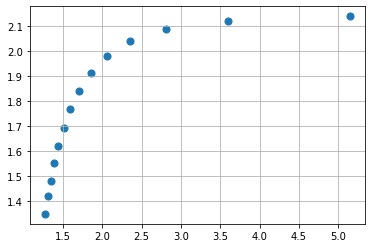

<Figure size 432x288 with 0 Axes>

In [3]:
# Display the dataset
plt.scatter(x_data[::1], y_data[::1], s=50)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
#files.download('dataset.png') 

# Create the model
Create the model with two 64 units hidden layers.

In [4]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units=5, activation = 'relu',input_dim=1))
model.add(keras.layers.Dense(units=5, activation= 'relu'))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(learning_rate=0.001))

# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


2022-08-20 08:52:55.512232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-20 08:52:55.530365: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-20 08:52:55.530479: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-20 08:52:55.531032: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

## Training over 100 epochs

In [5]:
# Training
model.fit( x_data, y_data,epochs=75, batch_size=10)

Epoch 1/75
2/2 [==============================] - 0s 3ms/step - loss: 3.4299
Epoch 2/75
2/2 [==============================] - 0s 2ms/step - loss: 3.3567
Epoch 3/75
2/2 [==============================] - 0s 1ms/step - loss: 3.2873
Epoch 4/75
2/2 [==============================] - 0s 1ms/step - loss: 3.2213
Epoch 5/75
2/2 [==============================] - 0s 1ms/step - loss: 3.1558
Epoch 6/75
2/2 [==============================] - 0s 1ms/step - loss: 3.0911
Epoch 7/75
2/2 [==============================] - 0s 1ms/step - loss: 3.0298
Epoch 8/75
2/2 [==============================] - 0s 1ms/step - loss: 2.9672
Epoch 9/75
2/2 [==============================] - 0s 1ms/step - loss: 2.9062
Epoch 10/75
2/2 [==============================] - 0s 1ms/step - loss: 2.8489
Epoch 11/75
2/2 [==============================] - 0s 1ms/step - loss: 2.7964
Epoch 12/75
2/2 [==============================] - 0s 1ms/step - loss: 2.7412
Epoch 13/75
2/2 [==============================] - 0s 1ms/step - loss: 2.

# Predict and display

1/1 [==============================] - 0s 63ms/step


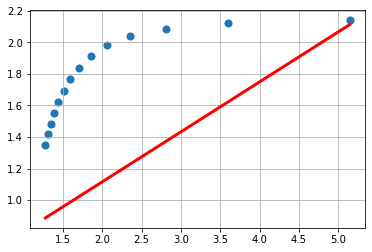

In [6]:
# Compute the output 
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data[::1], y_data[::1], s=50)
plt.plot(x_data, y_predicted, 'r', linewidth=3)
plt.grid()
#plt.show()
plt.savefig('training.png', dpi=300)
#files.download("training.png") 

## Create image sequence for the video

Run this section to generate a sequence of images for the [video](https://www.youtube.com/watch?v=7z86Lxzf_2o).

To get the video from the beginning, you have to reset the model weight. Re-creating the model should reseting the weights.

In [7]:
#for x in range(100):
#  # One epoch
#  model.fit( x_data, y_data, epochs=1, verbose=1)
#
#  # Compute the output 
#  y_predicted = model.predict(x_data)
#
#  # Display the result
#  plt.scatter(x_data[::1], y_data[::1], s=2)
#  plt.plot(x_data, y_predicted, 'r', linewidth=4)
#  plt.grid()
#  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
#  plt.ylim(bottom=-1.2)  
#  #plt.show()
#  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
#  #files.download('training-' + str(x) +'-epochs.png') 
#  plt.clf()

